# K-Mean Lab

## Lab Instruction 

In this lab, you are to cluster a 2-feature dataset by using K-mean clustering algorithm. <br>
The data file is`xclara.csv` <br>

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (6, 4)
plt.style.use('ggplot')
%config InlineBackend.figure_formats = {'png', 'retina'}

### 1. Load the data set and explore

In [2]:
# Import the dataset
data = pd.read_csv('./Lab2/xclara.csv')
print(data.shape)
data.head()

(3000, 2)


,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


### 2. Cluster the preprocessed data with K-mean clustering with 5 clusters

In [3]:
from sklearn.cluster import KMeans
from sklearn import preprocessing

X_train = data.values[:,0:2]
X = preprocessing.scale(X_train)

k=5
kmeans = KMeans(n_clusters=k).fit(X)
labels = kmeans.predict(X)

### 3. Visualize the cluster result

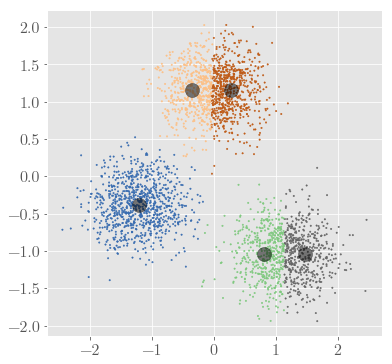

In [27]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=labels, s=2, cmap='Accent')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);



### 4. Determine an appropriate number of clusters based on the SSE.

### 4.1 Elbow method

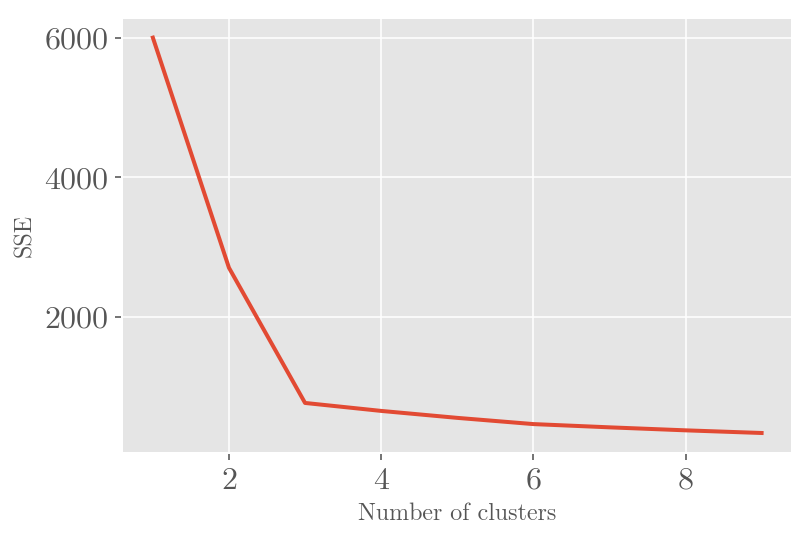

In [32]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k).fit(X)
    sse[k] = kmeans.inertia_
    
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

### 4.2 Silhoutte coefficients

In [15]:
from sklearn.metrics import silhouette_score
for k in range(2,10):
    labels = KMeans(n_clusters=k).fit(X).predict(X)
    print("K = {}, Silhouette score = {:1.4f}".format(k,silhouette_score(X, labels)))

K = 2, Silhouette score = 0.5519
K = 3, Silhouette score = 0.6912
K = 4, Silhouette score = 0.5517
K = 5, Silhouette score = 0.4325
K = 6, Silhouette score = 0.3476
K = 7, Silhouette score = 0.3437
K = 8, Silhouette score = 0.3395
K = 9, Silhouette score = 0.3373


### 5. Visualize the clustering result of the appropriate number of clusters.

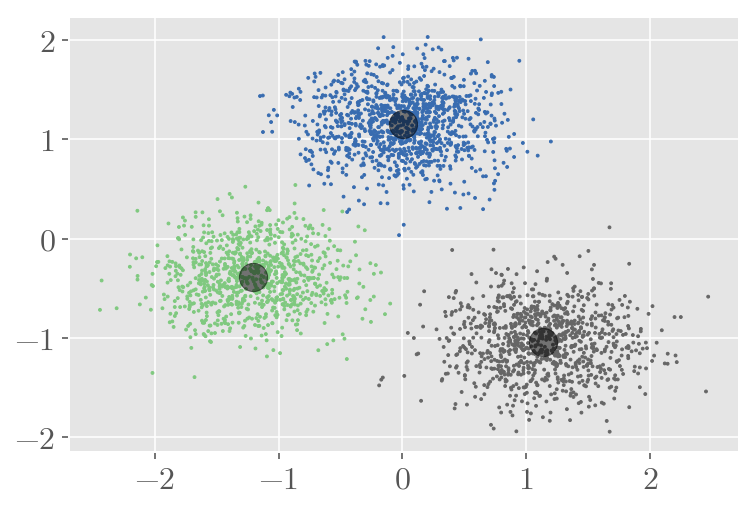

In [33]:
kmeans = KMeans(n_clusters=3).fit(X)
labels = kmeans.predict(X)

import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=labels, s=2, cmap='Accent')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);